In [144]:
import statsmodels.api as sm
import pylab as pl
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.svm import SVC


In [85]:
import pandas as pd
pandas.set_option('display.max_columns', 10)
pandas.set_option('display.width', 350)

In [10]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
df=pandas.read_csv("conversion_project.csv")

In [7]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


# 1. Use Exploratory and descriptive stats to sum up the data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [13]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [11]:
df['country'].value_counts()

US         178092
China       76602
UK          48450
Germany     13056
Name: country, dtype: int64

In [12]:
df['age'].value_counts()

30     14346
28     14341
29     14158
27     14084
26     13931
31     13692
32     13507
25     13460
24     12960
33     12631
23     12336
34     12108
22     11701
35     11471
21     10966
36     10779
20     10156
37      9761
19      9349
38      8970
18      8466
39      8202
17      7597
40      7148
41      6401
42      5588
43      4904
44      4224
45      3634
46      2994
47      2504
48      2121
49      1629
50      1356
51      1093
52       935
53       627
54       520
55       394
56       286
57       247
58       165
59       127
60        94
61        71
62        59
63        35
64        27
65        15
66         9
67         5
68         5
69         3
70         2
77         1
79         1
111        1
73         1
72         1
123        1
Name: age, dtype: int64

In [14]:
df['new_user'].value_counts()

1    216744
0     99456
Name: new_user, dtype: int64

In [15]:
df['source'].value_counts()

Seo       155040
Ads        88740
Direct     72420
Name: source, dtype: int64

In [16]:
df['converted'].value_counts()

0    306000
1     10200
Name: converted, dtype: int64

# Use graph to visualize the data and observe the patterns

In [26]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [18]:
base_color = sb.color_palette()[0]

### Conversion Rate By Country

In [28]:
conversion_by_country = df.groupby('country')['converted'].mean().reset_index(name = 'average_conversion_rate')

Text(0.5, 1.0, 'Conversion Rate by Country')

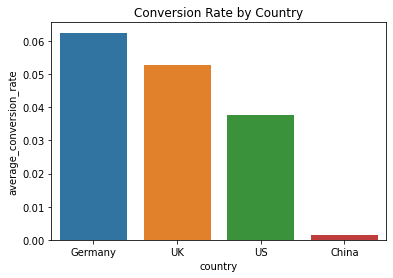

In [32]:
sb.barplot(data = conversion_by_country, x = 'country',y='average_conversion_rate', 
           order = conversion_by_country.sort_values('average_conversion_rate',ascending = False).country )
plt.title('Conversion Rate by Country')

### Conversion Rate By Age   

In [50]:
df['age'].value_counts()

30     14346
28     14341
29     14158
27     14084
26     13931
31     13692
32     13507
25     13460
24     12960
33     12631
23     12336
34     12108
22     11701
35     11471
21     10966
36     10779
20     10156
37      9761
19      9349
38      8970
18      8466
39      8202
17      7597
40      7148
41      6401
42      5588
43      4904
44      4224
45      3634
46      2994
47      2504
48      2121
49      1629
50      1356
51      1093
52       935
53       627
54       520
55       394
56       286
57       247
58       165
59       127
60        94
61        71
62        59
63        35
64        27
65        15
66         9
67         5
68         5
69         3
70         2
77         1
79         1
111        1
73         1
72         1
123        1
Name: age, dtype: int64

In [54]:
conversion_age = df.groupby('age')['converted'].mean().reset_index(name ='average_conversion_rate')

(15.0, 65.0)

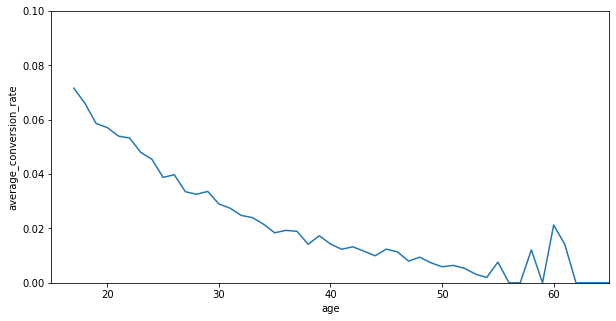

In [60]:
plt.figure(figsize = [10,5])
sb.lineplot(data =conversion_age, x='age',y='average_conversion_rate')
plt.ylim(0,0.1)
plt.xlim(15,65)

In [64]:
conversion_new_user = df.groupby('new_user')['converted'].mean().reset_index(name = 'average_conversion_rate')

([<matplotlib.axis.XTick at 0x7fe1ddcb8ed0>,
 [Text(0, 0, 'Old User'), Text(0, 0, 'New User')])

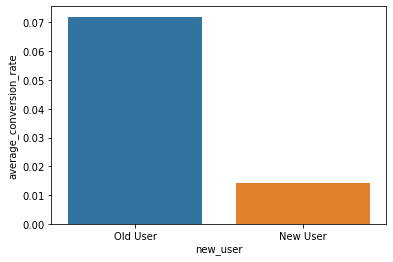

In [67]:
user_ticks = np.arange(0,2)
user_label = ['Old User','New User']
sb.barplot(data =conversion_new_user, x = 'new_user',y ='average_conversion_rate' )
plt.xticks(user_ticks,user_label)

In [61]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [70]:
conversion_source = df.groupby('source')['converted'].mean().reset_index(name = 'average_conversion_rate')

In [71]:
conversion_source

,source,average_conversion_rate
0,Ads,0.034483
1,Direct,0.028169
2,Seo,0.032895


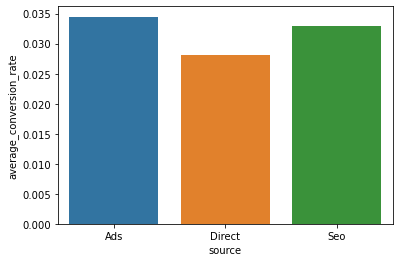

In [72]:
sb.barplot(data = conversion_source, x ='source',y='average_conversion_rate')

In [73]:
conversion_page_visited = df.groupby('total_pages_visited')['converted'].mean().reset_index(name = 'average_conversion_rate')

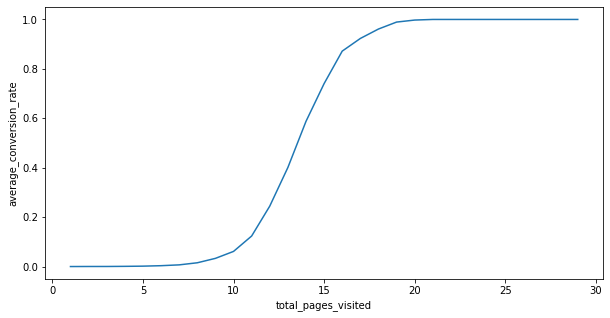

In [74]:
plt.figure(figsize = [10,5])
sb.lineplot(data =conversion_page_visited, x='total_pages_visited',y='average_conversion_rate')

# Logistic Regression Model 

In [76]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [97]:
df['user_type'] = df['new_user'].apply(lambda x: 'new user' if x ==1 else 'old user')

In [98]:
df['intercept'] = 1 
df[['China','Germany','UK','US']] = pd.get_dummies(df['country'])
df[['Ads','Direct','Seo']] = pd.get_dummies(df['source'])
df[['new user','old user']]=pd.get_dummies(df['user_type'])

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
 6   user_type            316200 non-null  object
 7   intercept            316200 non-null  int64 
 8   China                316200 non-null  uint8 
 9   Germany              316200 non-null  uint8 
 10  UK                   316200 non-null  uint8 
 11  US                   316200 non-null  uint8 
 12  Ads                  316200 non-null  uint8 
 13  Direct               316200 non-null  uint8 
 14  Seo                  316200 non-null  uint8 
 15  new user             316200 non-nu

In [114]:
lm = sm.Logit(df['converted'], df[['intercept','age','China','Germany','UK','Seo','Direct','new user','total_pages_visited']])
lm_result = lm.fit()
lm_result.summary()

Optimization terminated successfully.
         Current function value: 0.040647
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               316200
Model:                          Logit   Df Residuals:                   316191
Method:                           MLE   Df Model:                            8
Date:                Tue, 02 Feb 2021   Pseudo R-squ.:                  0.7148
Time:                        22:49:31   Log-Likelihood:                -12853.
converged:                       True   LL-Null:                       -45060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept              -7.1190      0.094    -75.462      0.000      -7.304      -6.934
age                    -0.0731      0.002    -30.858      0.000      -0.078      -0.068
China                  -3.2462      0.117    -27.847      0.000      -3.475      -3.018
Germany                 0.5728      0.068      8.404      0.000       0.439       0.706
UK                      0.3643      0.041      8.879      0.000       0.284       0.445
Seo                    -0.0241      0.040     -0.606      0.544      -0.102       0.054
Direct                 -0.1867      0.049     -3.833      0.000      -0.282      -0.091
new user               -1.7395      0.036    -48.906      0.000      -1.809      -1.670
total_pages_visited     0.7582      0.006    122.134      0.000       0.746       0.770
=======================================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [115]:
df['predict']=lm_result.predict(df[['intercept','age','China','Germany','UK','Seo','Direct','new user','total_pages_visited']])

In [126]:
fpr, tpr, thresholds =roc_curve(df['converted'], df['predict'])
roc_auc = auc(fpr, tpr)
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),
                    'tpr' : pd.Series(tpr, index = i), 
                    '1-fpr' : pd.Series(1-fpr, index = i),
                    'tf' : pd.Series(tpr - (1-fpr), index = i),
                    'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.986002


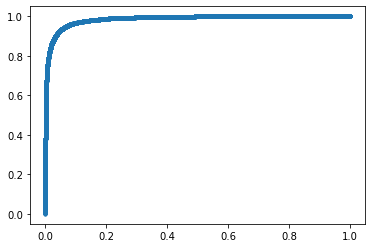

In [128]:
plt.plot(fpr,tpr,marker = '.',label = 'Logistic (auc = %0.3f)'%roc_auc)

## Randome Forest

In [133]:
X=df[['intercept','age','China','Germany','UK','Seo','Direct','new user','total_pages_visited']]
y=df['converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) 

In [135]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9837851269540074


In [150]:
rf_fpr, rf_tpr, rf_thresholds =roc_curve(y_test, y_pred)
rf_roc_auc = auc(rf_fpr, rf_tpr)

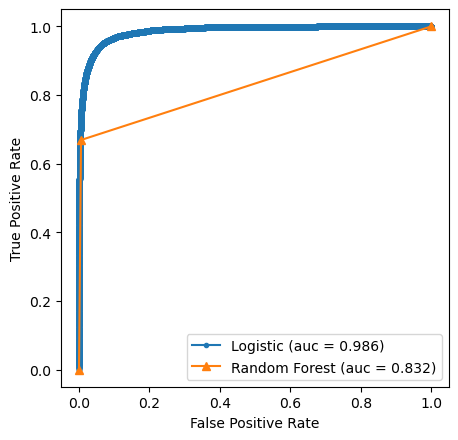

In [155]:
plt.figure(figsize = (5,5),dpi = 100)
plt.plot(fpr,tpr,marker = '.',label = 'Logistic (auc = %0.3f)'%roc_auc)
plt.plot(rf_fpr,rf_tpr,marker = '^',label = 'Random Forest (auc = %0.3f)'%rf_roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()